In [30]:
import os
import numpy as np
import pandas as p
import zipfile 
import matplotlib.image as image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras import backend as K 
import skimage.io as iio
from keras.layers import Dropout
from tensorflow.keras import layers, models




In [731]:
#This is to extract any necessary files. 
"""def extract(file):
    with zipfile.ZipFile(os.getcwd() + "/Pictures/" + file, 'r') as zip_ref:
        zip_ref.extractall(os.getcwd()+"/Pictures/")
extract("64.zip")
"""

'def extract(file):\n    with zipfile.ZipFile(os.getcwd() + "/Pictures/" + file, \'r\') as zip_ref:\n        zip_ref.extractall(os.getcwd()+"/Pictures/")\nextract("64.zip")\n'

In [40]:
#Augmented folder because Waldo folder only contains aa few images. 
waldo_images = os.listdir(os.getcwd() + "/Pictures/64/augmented")
notwaldo_images = os.listdir(os.getcwd() + "/Pictures/64/notwaldo")
X = []
y = [] 

for img in waldo_images:
    try:
        X.append(image.imread(os.getcwd() + "/Pictures/64/augmented/" + str(img)))
        y.append(1)
    except:
        continue

for img in notwaldo_images:
    X.append(image.imread(os.getcwd() + "/Pictures/64/notwaldo/" + str(img)))
    y.append(0)
X = np.array(X)
y = np.column_stack(y).T
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [41]:
#Model from https://www.tensorflow.org/tutorials/images/cnn, edited as needed e.g. adding dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(32, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(32, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #loss = "categorical_crossentropy",
              metrics=['accuracy'])



K.set_value(model.optimizer.learning_rate, .00001)
#Line of code below from https://stackoverflow.com/questions/48285129/saving-best-model-in-keras#mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=0, mode='max')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_accuracy', mode='min')
history = model.fit(X_train, y_train, callbacks=[earlyStopping, mcp_save], epochs=10, validation_data= (X_test,y_test))



Epoch 1/10
267/267 [==============================] - 18s 64ms/step - loss: 2.6584 - accuracy: 0.5013 - val_loss: 0.3983 - val_accuracy: 0.4944
Epoch 2/10
267/267 [==============================] - 19s 72ms/step - loss: 0.4913 - accuracy: 0.5082 - val_loss: 0.3908 - val_accuracy: 0.4944
Epoch 3/10
267/267 [==============================] - 18s 67ms/step - loss: 0.4639 - accuracy: 0.5091 - val_loss: 0.3818 - val_accuracy: 0.4972
Epoch 4/10
267/267 [==============================] - 24s 91ms/step - loss: 0.4660 - accuracy: 0.5118 - val_loss: 0.3742 - val_accuracy: 0.5070
Epoch 5/10
267/267 [==============================] - 13s 50ms/step - loss: 0.4348 - accuracy: 0.5224 - val_loss: 0.3601 - val_accuracy: 0.6007
Epoch 6/10
267/267 [==============================] - 16s 59ms/step - loss: 0.4052 - accuracy: 0.5577 - val_loss: 0.3501 - val_accuracy: 0.7472
Epoch 7/10
267/267 [==============================] - 14s 52ms/step - loss: 0.3952 - accuracy: 0.5864 - val_loss: 0.3394 - val_accuracy:

In [42]:
model.evaluate(X_test,y_test)

67/67 [==============================] - 1s 9ms/step - loss: 0.3010 - accuracy: 1.0000


[0.3009832501411438, 1.0]

In [47]:
images=[]
waldo = 0 
iter = 0 
for i in os.listdir(os.getcwd()+"/Pictures/64/Test/"):
   try:
      if iio.imread(os.getcwd()+"/Pictures/64/Test/"+i).shape == (64, 64, 3):
         if i == 'slice15.jpg':
            waldo = iter
         images.append(iio.imread(os.getcwd()+"/Pictures/64/Test/"+i))
         iter+=1
   except:
      continue

predictor = model.predict((np.asarray(images)))
ones = []
for i in predictor:
    ones.append(i[1])
(-np.asarray(ones)).argsort()[:15]

array([149, 132, 104, 162,  94,  22,  84,   6,  59,  10, 117, 103,  39,
       174, 110])

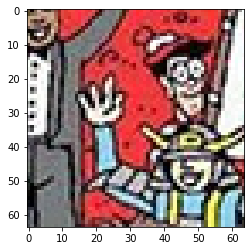

In [48]:
#Waldo
plt.imshow(images[waldo])

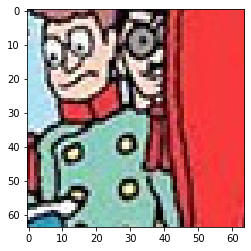

In [49]:
#Top choice
plt.imshow(images[(-np.asarray(ones)).argsort()[0]])

In [ ]:
#The ccode below is for generating the necessary images. They've already bbeen generated whch is why it's commented out. 
"""
#This is from https://github.com/ThomasADuffy/Whos-Waldo-Capstone-2/blob/master/images/plots_structures/Model_v1.jpg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    brightness_range=(.7,1.3),
    fill_mode='nearest')
i = 0
gen= datagen.flow_from_directory(
        os.getcwd() + "/Pictures/64/",
        target_size=(64, 64),
        batch_size=1, color_mode='rgb',
    class_mode='binary', shuffle=True, interpolation='nearest',
    save_to_dir= os.getcwd() + "/Pictures/64/augmented",save_prefix="changed")
i = 0
while i <= 5338:
    try:
        gen.next()
        i+=1
    except:
        break
"""
